In [61]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Method

1. Import and convert Data
2. Split the dataset to 70:30 then test each Naive Bayes method on it
3. Split the dataset to 75:25 then test each Naive Bayes method on it
4. Split the dataset to 80:20 then test each Naive Bayes method on it
5. Graphs

1. Import and convert Data

In [62]:
# Import Cleaned Data
data = pd.read_csv("merged.csv")

In [63]:
# Transform each value in parameterwaterbody
# Using Ordinal Encoder to dummies the value
from sklearn.preprocessing import OrdinalEncoder
from itertools import chain
encoder = OrdinalEncoder()
data[["parameterWaterBodyCategory"]] = encoder.fit_transform(data[["parameterWaterBodyCategory"]])

encoder_serial_number = encoder.categories_                              # Stored the Categories
encoder_serial_number = list(chain.from_iterable(encoder_serial_number)) # Flatten
encoder_data_set = pd.DataFrame( {"Number": range(len(encoder_serial_number)), 
                                  "Data": encoder_serial_number})

In [64]:
from sklearn.preprocessing import OrdinalEncoder
from itertools import chain
encoder = OrdinalEncoder()
data[["CountryCode"]] = encoder.fit_transform(data[["CountryCode"]])

encoder_serial_number = encoder.categories_                              # Stored the Categories
encoder_serial_number = list(chain.from_iterable(encoder_serial_number)) # Flatten
encoder_data_set = pd.DataFrame( {"Number": range(len(encoder_serial_number)), 
                                  "Data": encoder_serial_number})

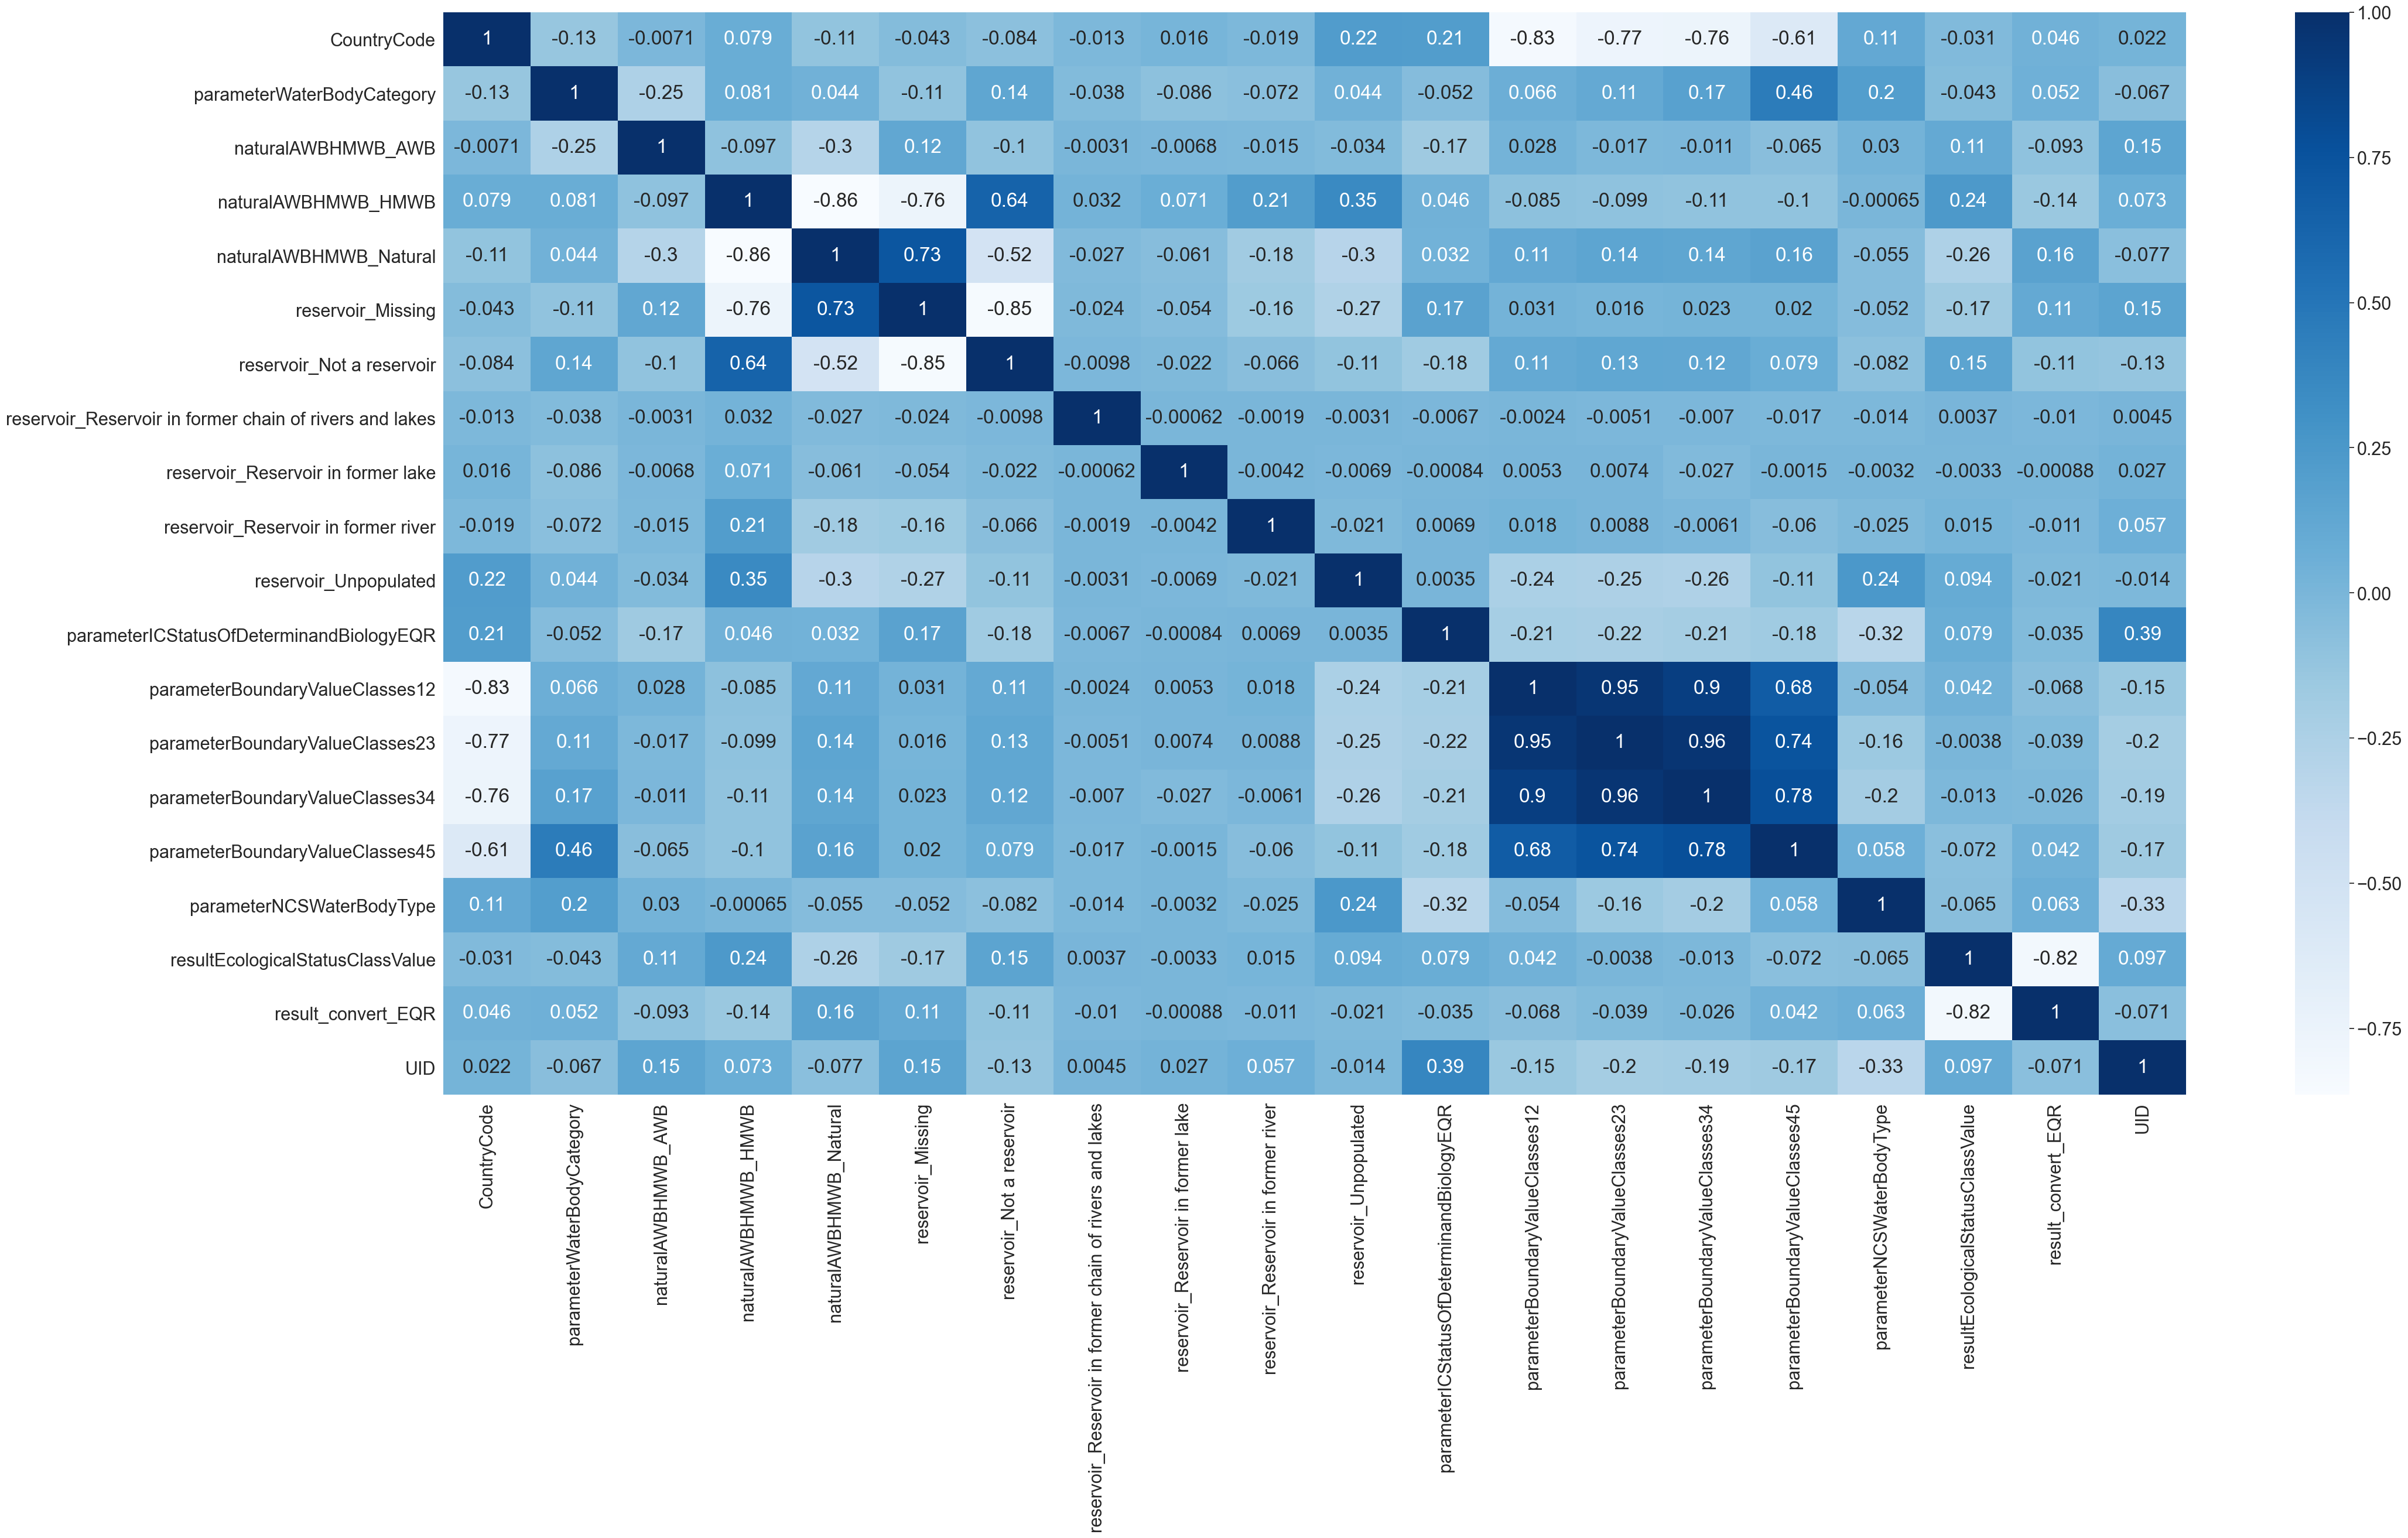

In [65]:
# Check Correlation between each correlation
sns.set(style="white",color_codes=True)            
sns.set(font_scale=2)                              
plt.figure(figsize=(48,24))                       
sns.heatmap(data.corr(),annot=True, cmap="Blues")
plt.show()

2. Split the dataset to 70:30 then test each Naive Bayes method on it

In [66]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y
model_num = 0                   # For iteration

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.30, 
                                                 random_state = 654) # 70% for training and 30% for testing

In [67]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [68]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.651238139319602


In [69]:
# Stored it to DataFrame
model_num +=1 
Model_Scores = pd.DataFrame({"Model Name" : "Gaussian Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])
Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1  Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324   0.75444

In [70]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [71]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6404767414950243


In [72]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Multinomial Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318

In [73]:
# Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [74]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6382781763480676


In [75]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Bernoulli Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   
Model 3    Bernoulli Naive Bayes Classifier  70:30        0.638278   0.570363   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318  
Model 3         0.696804      0.791010  0.740925

In [76]:
# Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [77]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6816709095116871


In [78]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Categorical Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   
Model 3    Bernoulli Naive Bayes Classifier  70:30        0.638278   0.570363   
Model 4  Categorical Naive Bayes Classifier  70:30        0.681671   0.630061   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318  
Model 3         0.696804      0.791010  0.740925  
Model 4         0.737083      0.797735  0.766211

3. Split the dataset to 75:25 then test each Naive Bayes method on it

In [79]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.25, 
                                                 random_state = 654) # 70% for training and 30% for testing

In [80]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [81]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6562066092752014


In [82]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Gaussian Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   
Model 3    Bernoulli Naive Bayes Classifier  70:30        0.638278   0.570363   
Model 4  Categorical Naive Bayes Classifier  70:30        0.681671   0.630061   
Model 5     Gaussian Naive Bayes Classifier  75:25        0.656207   0.579778   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318  
Model 3         0.696804      0.791010  0.740925  
Model 4         0.737083      0.797735  0.766211  
Model 5         0.703831      0.823119  0.758816

In [83]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [84]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.645931685642877


In [85]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Multinomial Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   
Model 3    Bernoulli Naive Bayes Classifier  70:30        0.638278   0.570363   
Model 4  Categorical Naive Bayes Classifier  70:30        0.681671   0.630061   
Model 5     Gaussian Naive Bayes Classifier  75:25        0.656207   0.579778   
Model 6  Multinomial Naive Bayes Classifier  75:25        0.645932   0.539930   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318  
Model 3         0.696804      0.791010  0.740925  
Model 4         0.737083      0.797735  0.766211  
Model 5         0.703831      0.823119  0.758816  
Model 6         0.678210      0.877430  0.765064

In [86]:
# Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [87]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6437100805331852


In [88]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Bernoulli Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   
Model 3    Bernoulli Naive Bayes Classifier  70:30        0.638278   0.570363   
Model 4  Categorical Naive Bayes Classifier  70:30        0.681671   0.630061   
Model 5     Gaussian Naive Bayes Classifier  75:25        0.656207   0.579778   
Model 6  Multinomial Naive Bayes Classifier  75:25        0.645932   0.539930   
Model 7    Bernoulli Naive Bayes Classifier  75:25        0.643710   0.574236   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318  
Model 3         0.696804      0.791010  0.740925  
Model 4         0.737083      0.797735  0.766211  
Model 5         0.703831      0.823119  0.758816  
Model 6         0.678210      0.877430  0.765064  
Model 7         0.701977      0.795435  0.745790

In [89]:
# Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [90]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6866148292141072


In [91]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Categorical Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   
Model 3    Bernoulli Naive Bayes Classifier  70:30        0.638278   0.570363   
Model 4  Categorical Naive Bayes Classifier  70:30        0.681671   0.630061   
Model 5     Gaussian Naive Bayes Classifier  75:25        0.656207   0.579778   
Model 6  Multinomial Naive Bayes Classifier  75:25        0.645932   0.539930   
Model 7    Bernoulli Naive Bayes Classifier  75:25        0.643710   0.574236   
Model 8  Categorical Naive Bayes Classifier  75:25        0.686615   0.633980   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318  
Model 3         0.696804      0.791010  0.740925  
Model 4         0.737083      0.797735  0.766211  
Model 5         0.703831      0.823119  0.758816  
Model 6         0.678210      0.877430  0.765064  
Model 7         0.701977      0.795435  0.745790  
Model 8         0.742125      0.801564  0.770700

In [92]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2, 
                                                 random_state = 654) # 70% for training and 30% for testing

In [93]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [94]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6545738587050859


In [95]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Gaussian Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  AUC score  \
Model 1     Gaussian Naive Bayes Classifier  70:30        0.651238   0.576496   
Model 2  Multinomial Naive Bayes Classifier  70:30        0.640477   0.537500   
Model 3    Bernoulli Naive Bayes Classifier  70:30        0.638278   0.570363   
Model 4  Categorical Naive Bayes Classifier  70:30        0.681671   0.630061   
Model 5     Gaussian Naive Bayes Classifier  75:25        0.656207   0.579778   
Model 6  Multinomial Naive Bayes Classifier  75:25        0.645932   0.539930   
Model 7    Bernoulli Naive Bayes Classifier  75:25        0.643710   0.574236   
Model 8  Categorical Naive Bayes Classifier  75:25        0.686615   0.633980   
Model 9     Gaussian Naive Bayes Classifier  80:20        0.654574   0.579487   

         Precision score  Recall score  F1-score  
Model 1         0.699079      0.819324  0.754440  
Model 2         0.673961      0.872058  0.760318  
Model 3         0.696804      0.791010  0.740925  
Model 4         0.737083      0.797735  0.766211  
Model 5         0.703831      0.823119  0.758816  
Model 6         0.678210      0.877430  0.765064  
Model 7         0.701977      0.795435  0.745790  
Model 8         0.742125      0.801564  0.770700  
Model 9         0.703359      0.819408  0.756961

In [96]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [97]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6406873806630793


In [98]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Multinomial Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  \
Model 1      Gaussian Naive Bayes Classifier  70:30        0.651238   
Model 2   Multinomial Naive Bayes Classifier  70:30        0.640477   
Model 3     Bernoulli Naive Bayes Classifier  70:30        0.638278   
Model 4   Categorical Naive Bayes Classifier  70:30        0.681671   
Model 5      Gaussian Naive Bayes Classifier  75:25        0.656207   
Model 6   Multinomial Naive Bayes Classifier  75:25        0.645932   
Model 7     Bernoulli Naive Bayes Classifier  75:25        0.643710   
Model 8   Categorical Naive Bayes Classifier  75:25        0.686615   
Model 9      Gaussian Naive Bayes Classifier  80:20        0.654574   
Model 10  Multinomial Naive Bayes Classifier  80:20        0.640687   

          AUC score  Precision score  Recall score  F1-score  
Model 1    0.576496         0.699079      0.819324  0.754440  
Model 2    0.537500         0.673961      0.872058  0.760318  
Model 3    0.570363         0.696804      0.791010  0.740925  
Model 4    0.630061         0.737083      0.797735  0.766211  
Model 5    0.579778         0.703831      0.823119  0.758816  
Model 6    0.539930         0.678210      0.877430  0.765064  
Model 7    0.574236         0.701977      0.795435  0.745790  
Model 8    0.633980         0.742125      0.801564  0.770700  
Model 9    0.579487         0.703359      0.819408  0.756961  
Model 10   0.536992         0.676277      0.868324  0.760361

In [99]:
# Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [100]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6422496094428051


In [101]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Bernoulli Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  \
Model 1      Gaussian Naive Bayes Classifier  70:30        0.651238   
Model 2   Multinomial Naive Bayes Classifier  70:30        0.640477   
Model 3     Bernoulli Naive Bayes Classifier  70:30        0.638278   
Model 4   Categorical Naive Bayes Classifier  70:30        0.681671   
Model 5      Gaussian Naive Bayes Classifier  75:25        0.656207   
Model 6   Multinomial Naive Bayes Classifier  75:25        0.645932   
Model 7     Bernoulli Naive Bayes Classifier  75:25        0.643710   
Model 8   Categorical Naive Bayes Classifier  75:25        0.686615   
Model 9      Gaussian Naive Bayes Classifier  80:20        0.654574   
Model 10  Multinomial Naive Bayes Classifier  80:20        0.640687   
Model 11    Bernoulli Naive Bayes Classifier  80:20        0.642250   

          AUC score  Precision score  Recall score  F1-score  
Model 1    0.576496         0.699079      0.819324  0.754440  
Model 2    0.537500         0.673961      0.872058  0.760318  
Model 3    0.570363         0.696804      0.791010  0.740925  
Model 4    0.630061         0.737083      0.797735  0.766211  
Model 5    0.579778         0.703831      0.823119  0.758816  
Model 6    0.539930         0.678210      0.877430  0.765064  
Model 7    0.574236         0.701977      0.795435  0.745790  
Model 8    0.633980         0.742125      0.801564  0.770700  
Model 9    0.579487         0.703359      0.819408  0.756961  
Model 10   0.536992         0.676277      0.868324  0.760361  
Model 11   0.574436         0.701853      0.791116  0.743816

In [102]:
# Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [103]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6938031591737546


In [104]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Categorical Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

Model Name  Split  Accuracy_score  \
Model 1      Gaussian Naive Bayes Classifier  70:30        0.651238   
Model 2   Multinomial Naive Bayes Classifier  70:30        0.640477   
Model 3     Bernoulli Naive Bayes Classifier  70:30        0.638278   
Model 4   Categorical Naive Bayes Classifier  70:30        0.681671   
Model 5      Gaussian Naive Bayes Classifier  75:25        0.656207   
Model 6   Multinomial Naive Bayes Classifier  75:25        0.645932   
Model 7     Bernoulli Naive Bayes Classifier  75:25        0.643710   
Model 8   Categorical Naive Bayes Classifier  75:25        0.686615   
Model 9      Gaussian Naive Bayes Classifier  80:20        0.654574   
Model 10  Multinomial Naive Bayes Classifier  80:20        0.640687   
Model 11    Bernoulli Naive Bayes Classifier  80:20        0.642250   
Model 12  Categorical Naive Bayes Classifier  80:20        0.693803   

          AUC score  Precision score  Recall score  F1-score  
Model 1    0.576496         0.699079      0.819324  0.754440  
Model 2    0.537500         0.673961      0.872058  0.760318  
Model 3    0.570363         0.696804      0.791010  0.740925  
Model 4    0.630061         0.737083      0.797735  0.766211  
Model 5    0.579778         0.703831      0.823119  0.758816  
Model 6    0.539930         0.678210      0.877430  0.765064  
Model 7    0.574236         0.701977      0.795435  0.745790  
Model 8    0.633980         0.742125      0.801564  0.770700  
Model 9    0.579487         0.703359      0.819408  0.756961  
Model 10   0.536992         0.676277      0.868324  0.760361  
Model 11   0.574436         0.701853      0.791116  0.743816  
Model 12   0.631286         0.736410      0.831042  0.780870

Graphs

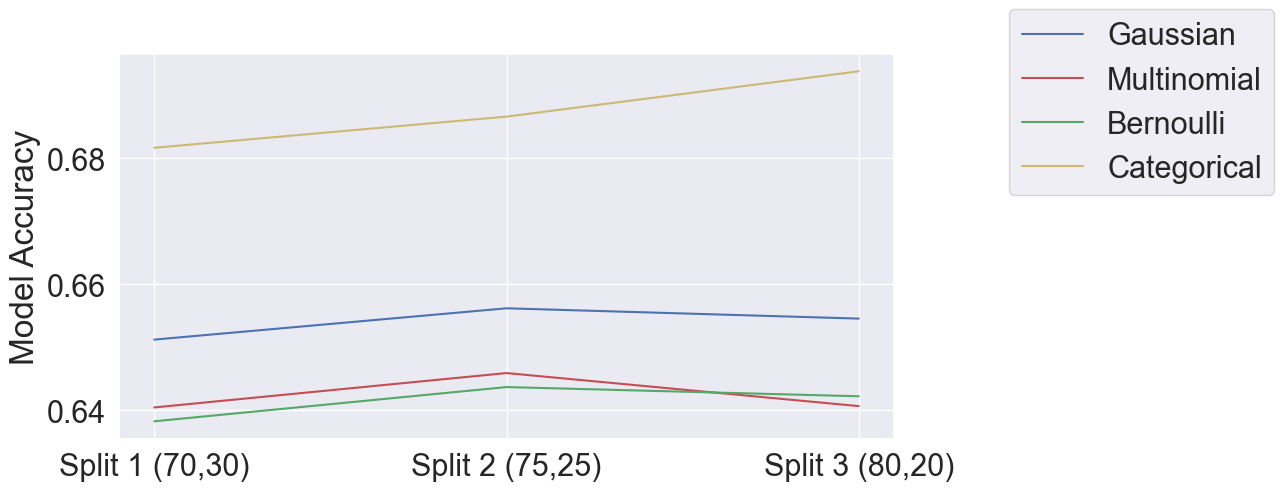

In [105]:
plt.figure(figsize=(10,5))
plt.ylabel('Model Accuracy')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["Accuracy_score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["Accuracy_score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["Accuracy_score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["Accuracy_score"]

plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')

plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

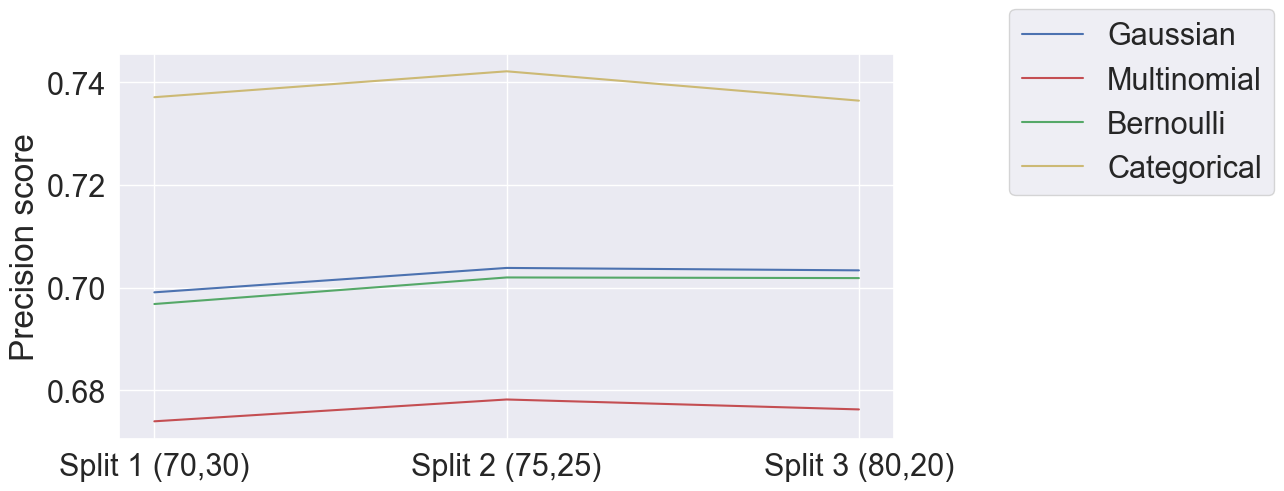

In [106]:
plt.figure(figsize=(10,5))
plt.ylabel('Precision score')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["Precision score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["Precision score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["Precision score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["Precision score"]

plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')

plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

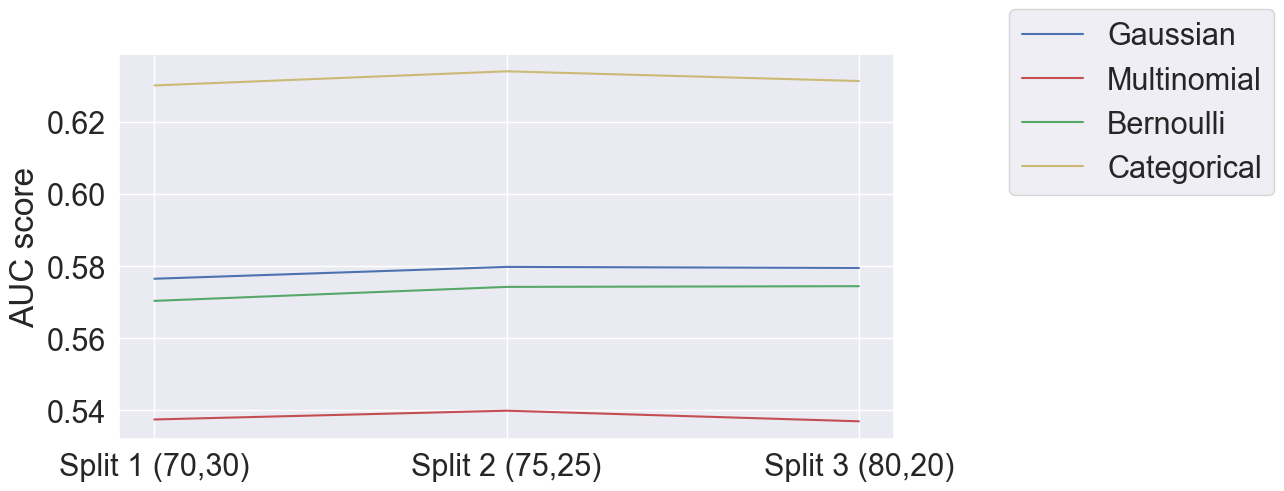

In [107]:
plt.figure(figsize=(10,5))
plt.ylabel('AUC score')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["AUC score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["AUC score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["AUC score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["AUC score"]

plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')

plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

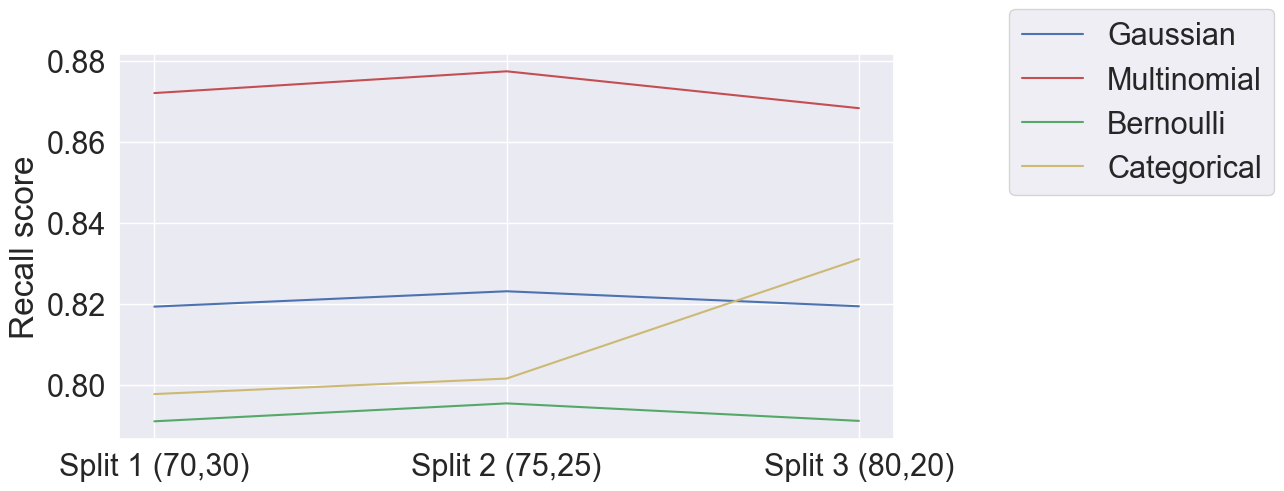

In [108]:
plt.figure(figsize=(10,5))
plt.ylabel('Recall score')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["Recall score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["Recall score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["Recall score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["Recall score"]

plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')

plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

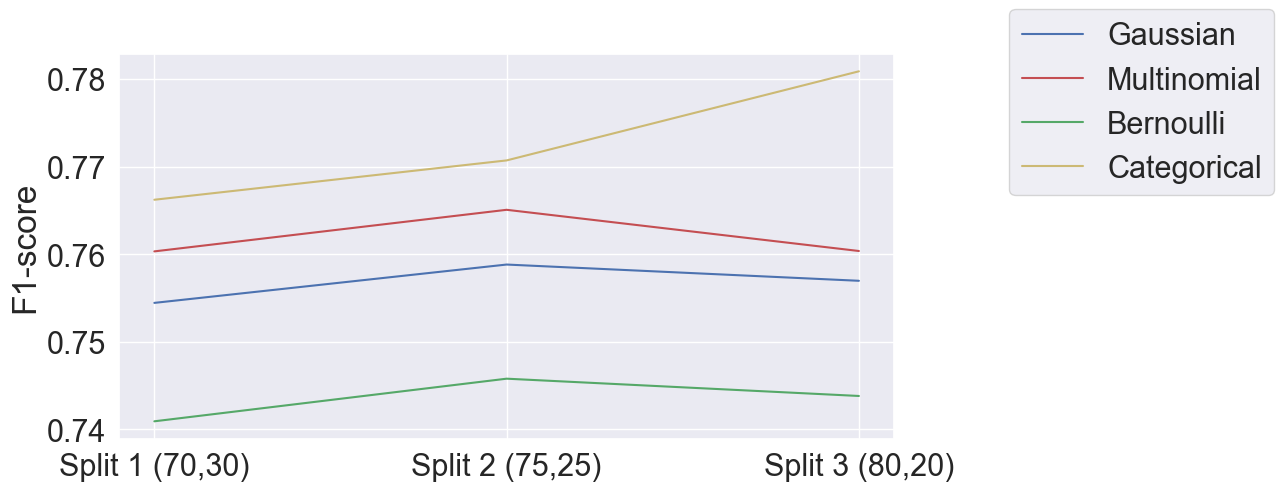

In [109]:
plt.figure(figsize=(10,5))
plt.ylabel('F1-score')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["F1-score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["F1-score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["F1-score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["F1-score"]

plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')

plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

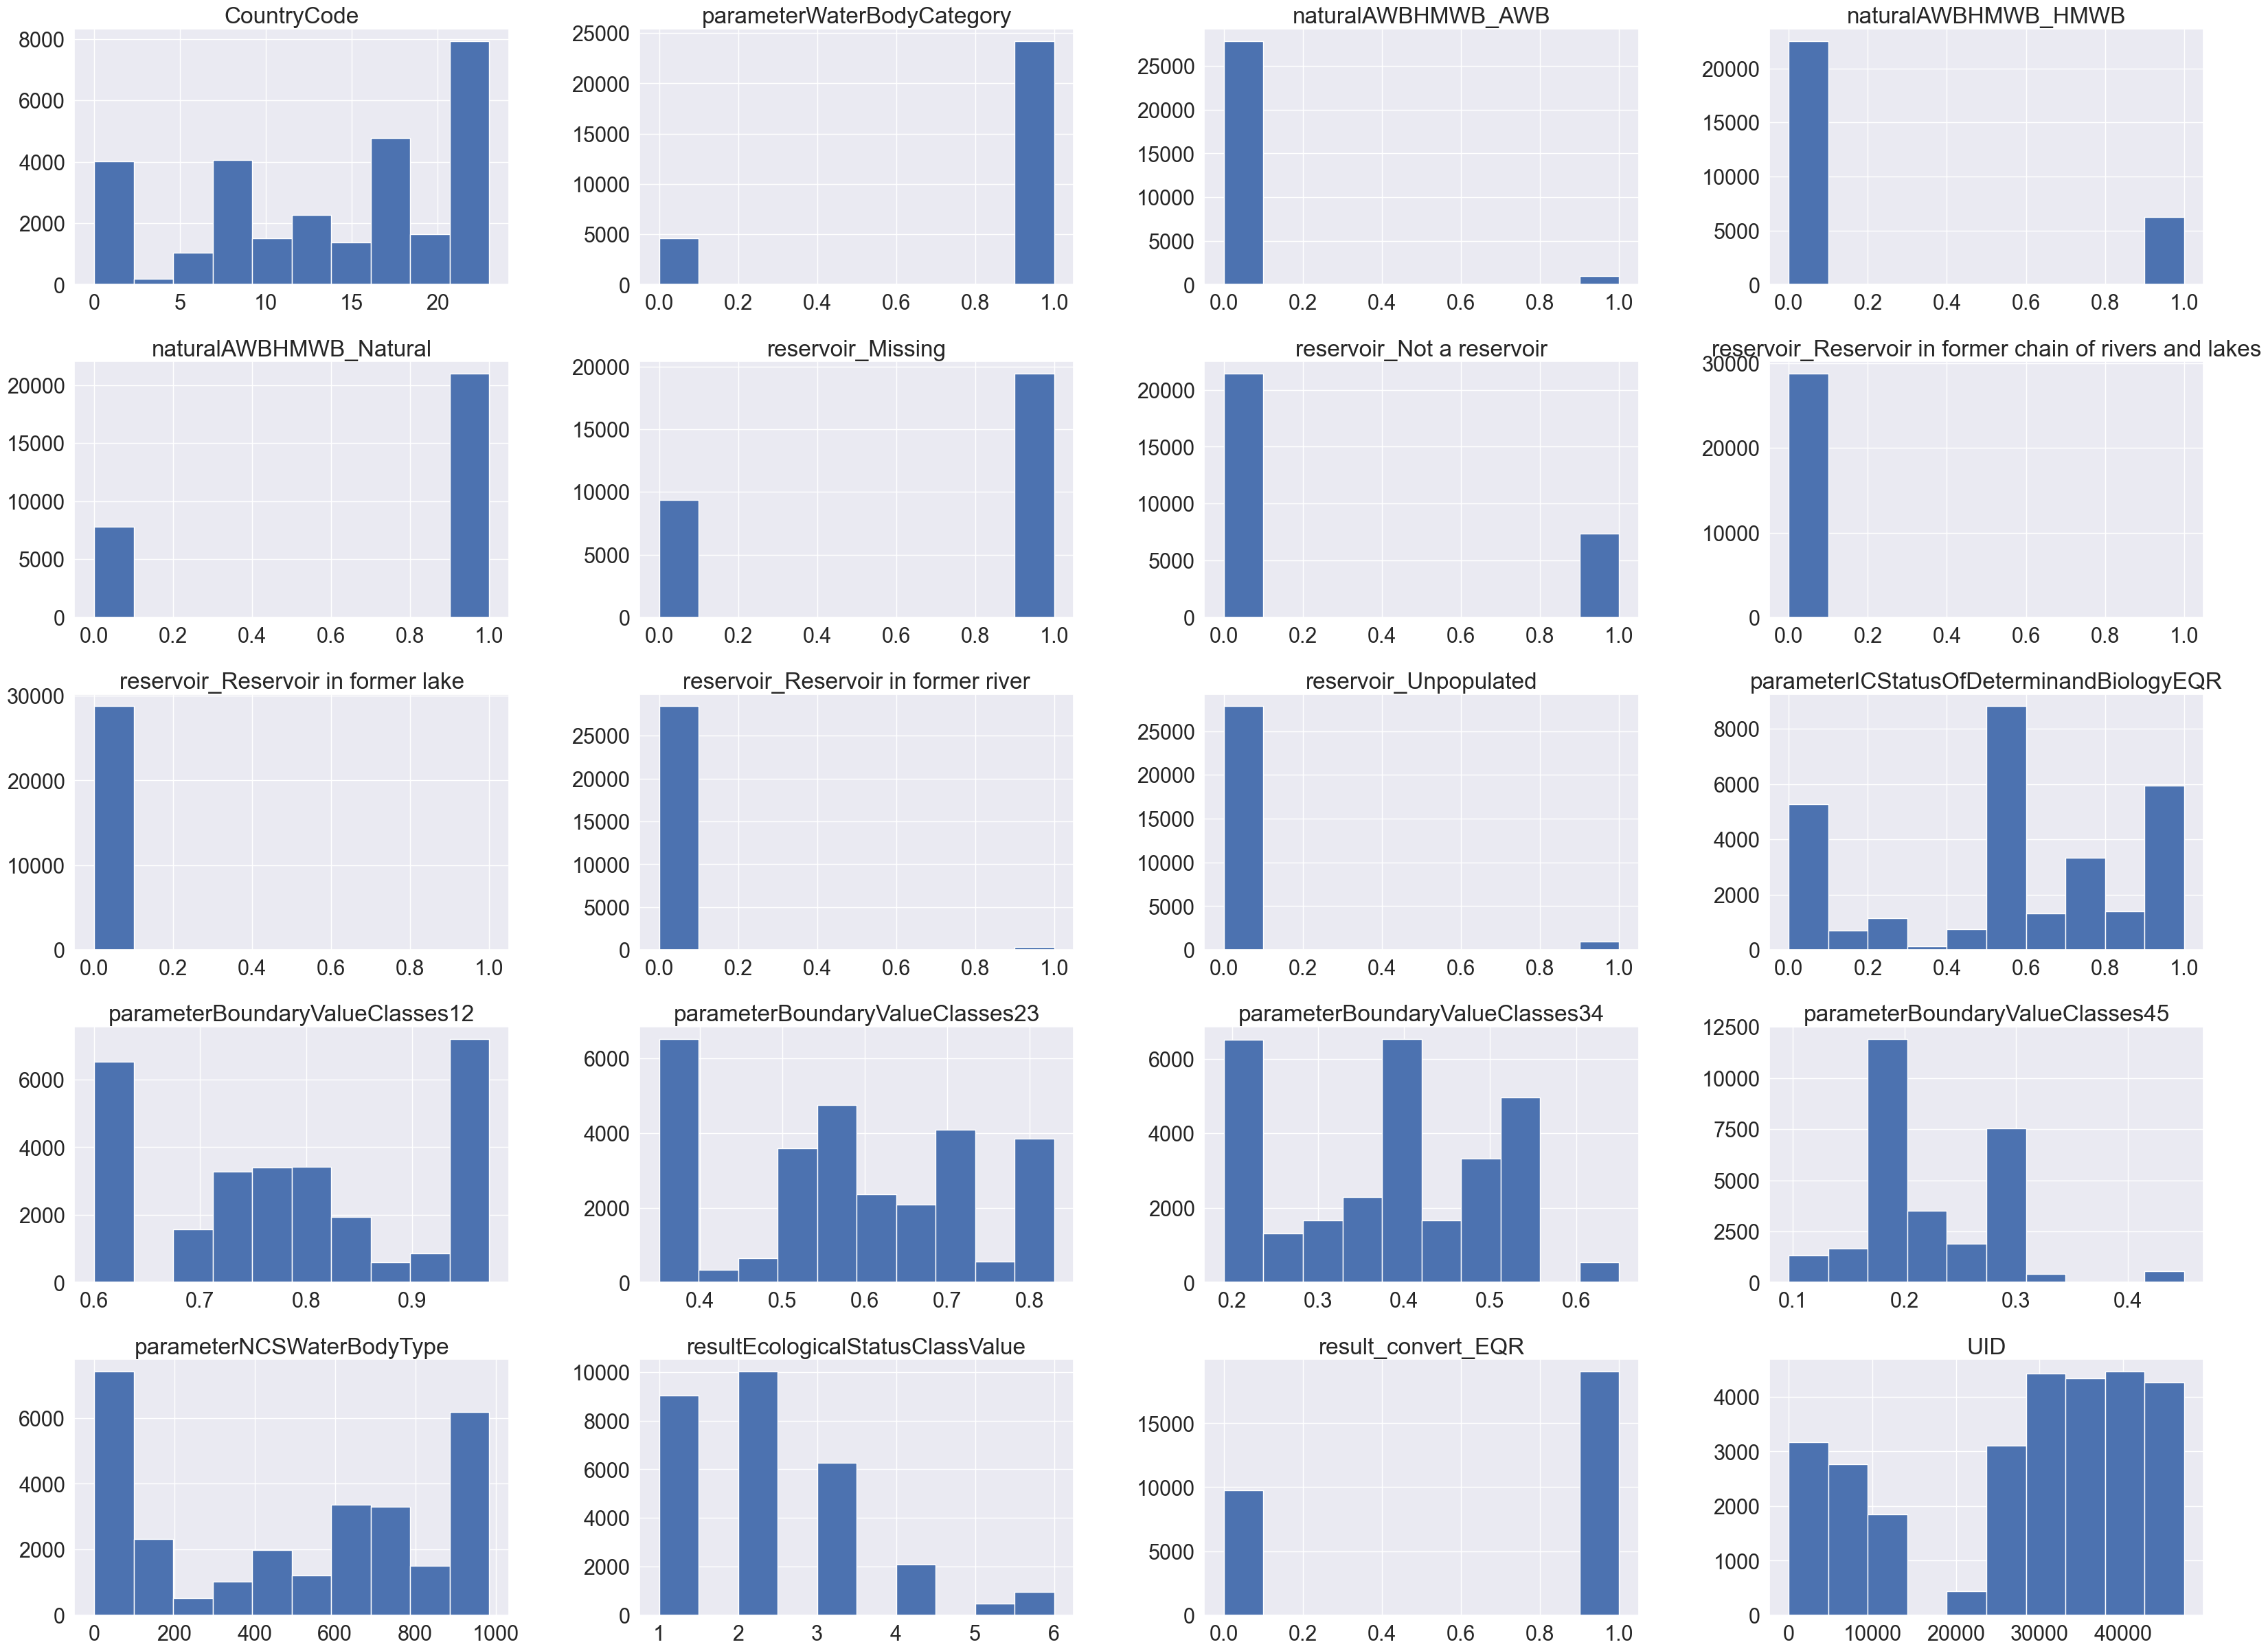

In [110]:
data.hist(figsize=(40,30))
plt.show()

From the naïve bayes model result, the reason why the highest value is come from the Categorical naïve bayes model is because our data is mainly a categorical data. But the others naïve bayes model use different method to evaluate. Therefore, there accuracy is slightly lower compared to categorical naïve bayes. For example, Multinomial naïve bayes and Gaussian naïve bayes will output as a class. But Bernoulli naïve bayes will output as a binary value. This will result in a slightly different in all parameter. For example, accuracy, precision, area under the curve, F1-score and recall.